In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
%matplotlib inline

In [2]:
df=pd.read_csv('SalaryData.csv')

In [3]:
df.head()

,Education,Occupation,Salary
0,Doctorate,Adm-clerical,153197
1,Doctorate,Adm-clerical,115945
2,Doctorate,Adm-clerical,175935
3,Doctorate,Adm-clerical,220754
4,Doctorate,Sales,170769


In [4]:
df.shape

(40, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


In [6]:
df.describe(include='all')

,Education,Occupation,Salary
count,40,40,40.000000
unique,3,4,NaN
top,Doctorate,Prof-specialty,NaN
freq,16,13,NaN
mean,NaN,NaN,162186.875000
std,NaN,NaN,64860.407506
min,NaN,NaN,50103.000000
25%,NaN,NaN,99897.500000
50%,NaN,NaN,169100.000000
75%,NaN,NaN,214440.750000


𝐻0  : The means of 'Salary' with respect to category of Education is equal.

𝐻1  : At least one of the means of 'Salary' varies with respect to Education

In [7]:
formula = 'Salary ~ C(Education)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

                df        sum_sq       mean_sq         F        PR(>F)
C(Education)   2.0  1.026955e+11  5.134773e+10  30.95628  1.257709e-08
Residual      37.0  6.137256e+10  1.658718e+09       NaN           NaN


In [8]:
# Since the p value is less than  the significance level 𝛼  (0.05), we can say that we reject the Null Hypothesis ( 𝐻0 ).

𝐻0 : The means of 'Salary' with respect to category of Occupation is equal.

𝐻1 : At least one of the means of 'Salary' varies with respect to Occupation

In [9]:
formula1 = 'Salary ~ C(Occupation)'
model1 = ols(formula1, df).fit()
aov_table1 = anova_lm(model1)
print(aov_table1)

                 df        sum_sq       mean_sq         F    PR(>F)
C(Occupation)   3.0  1.125878e+10  3.752928e+09  0.884144  0.458508
Residual       36.0  1.528092e+11  4.244701e+09       NaN       NaN


In [10]:
# Since the p value is more than the significance level, we fail to reject the null hypothesis

Plot the interaction plot between the two variables and comment on the extent of interaction between the two categorical variables

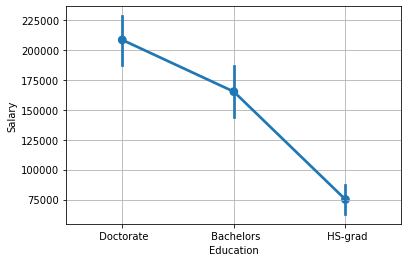

In [11]:
sns.pointplot(x = 'Education', y = 'Salary',data=df)
plt.grid()
plt.show()

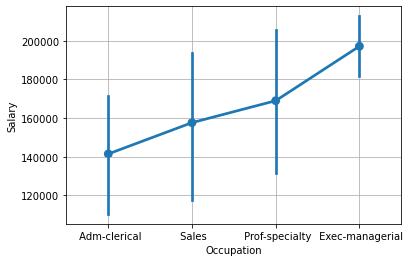

In [12]:
sns.pointplot(x = 'Occupation', y = 'Salary',data=df)
plt.grid()
plt.show()

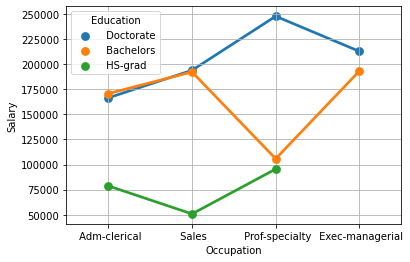

In [13]:
sns.pointplot(x = 'Occupation', y = 'Salary', hue='Education',data=df,ci=None )
plt.grid()
plt.show()

In [14]:
#Interaction Effect:
model=ols('Salary~C(Education)+C(Occupation)+C(Education):C(Occupation)',data=df).fit()
aov_table=anova_lm(model)
print(aov_table)

                              df        sum_sq       mean_sq          F  \
C(Education)                 2.0  1.026955e+11  5.134773e+10  72.211958   
C(Occupation)                3.0  5.519946e+09  1.839982e+09   2.587626   
C(Education):C(Occupation)   6.0  3.634909e+10  6.058182e+09   8.519815   
Residual                    29.0  2.062102e+10  7.110697e+08        NaN   

                                  PR(>F)  
C(Education)                5.466264e-12  
C(Occupation)               7.211580e-02  
C(Education):C(Occupation)  2.232500e-05  
Residual                             NaN  


As Occupation and Education interaction is 2.232500e-05 which is < 0.05 , there seems to be statistical interaction between both the variables.